In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import torch as tf
import plotly.express as px

C:\Users\nperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\nperez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
from prophet import Prophet
import matplotlib.pyplot as plt
import itertools

In [6]:
# LECTURA DE DATOS
dato=pd.read_excel(r'C:\Users\nperez\Documents\GitHub\Modelos_distribuci-n\datos\base de datos mantenimiento.xlsx')

In [ ]:
dato.head()

,NO_PROCESO,DIA,ANIO,MES,CICLO,IDINTER,IDREPOS,SISTEMA,ORIGEN,TIPO,...,SAIDIRURAL,KVAS_URBANOS,KVAS_RURALES,CLIENTES_U,CLIENTES_R,ENS_KWH,ENS_MONTO,DIA.1,MES.1,AÑO
0,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010001,D20100101000101,M,I,F,...,0.002482,0.0,48.0,0,81,36.024402,9.716143,1,1,2010
1,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010002,D20100101000201,M,I,F,...,0.000008,22127.0,513.0,15950,82,64.935387,17.257344,1,1,2010
2,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010003,D20100101000301,M,I,M,...,0.000123,0.0,15.0,0,34,1.797834,0.485082,1,1,2010
3,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010004,D20100101000401,M,I,F,...,0.002435,0.0,305.0,1,163,34.854515,9.380839,1,1,2010
4,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010005,D20100101000501,M,I,F,...,0.000000,48.0,0.0,47,0,16.355626,4.361248,1,1,2010


In [ ]:
dato.shape

(348113, 49)

In [ ]:
# VISUALIZACIÓN DE DATOS
dato.isnull().sum()

NO_PROCESO               0
DIA                      0
ANIO                     0
MES                      0
CICLO                    0
IDINTER                  0
IDREPOS                  0
SISTEMA                  0
ORIGEN                   0
TIPO                     0
RESOLUCIONSIGET     335997
FECHAIN                  0
FECHARP                  0
DURACION_HRS             0
TIPO_DURACION            0
APERTURA                 0
REPOSICION               0
SSEE_1                  11
CKTO_1                  11
SSEE_2              153639
CKTO_2              153639
REGION              153628
DOCUMENTO                0
TIPO_TICKET         153646
Causa General           80
Causa Especifica        80
'EST_TIEMPO'        153628
COMMENTS             60139
FMIK                     0
TTIK                     0
FMIKURBANO               0
TTIKURBANO               0
FMIKRURAL                0
TTIKRURAL                0
SAIFI                    0
SAIDI                    0
SAIFIURBANO              0
S

In [ ]:
#  DIMENSIONAMIENTO DE DATOS
dato.columns

Index(['NO_PROCESO', 'DIA', 'ANIO', 'MES', 'CICLO', 'IDINTER', 'IDREPOS',
       'SISTEMA', 'ORIGEN', 'TIPO', 'RESOLUCIONSIGET', 'FECHAIN', 'FECHARP',
       'DURACION_HRS', 'TIPO_DURACION', 'APERTURA', 'REPOSICION', 'SSEE_1',
       'CKTO_1', 'SSEE_2', 'CKTO_2', 'REGION', 'DOCUMENTO', 'TIPO_TICKET',
       'Causa General', 'Causa Especifica', ''EST_TIEMPO'', 'COMMENTS', 'FMIK',
       'TTIK', 'FMIKURBANO', 'TTIKURBANO', 'FMIKRURAL', 'TTIKRURAL', 'SAIFI',
       'SAIDI', 'SAIFIURBANO', 'SAIFIRURAL', 'SAIDIURBANO', 'SAIDIRURAL',
       'KVAS_URBANOS', 'KVAS_RURALES', 'CLIENTES_U', 'CLIENTES_R', 'ENS_KWH',
       'ENS_MONTO', 'DIA.1', 'MES.1', 'AÑO'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'NO_PROCESO'}>,
        <AxesSubplot: title={'center': 'ANIO'}>,
        <AxesSubplot: title={'center': 'CICLO'}>,
        <AxesSubplot: title={'center': 'FECHAIN'}>,
        <AxesSubplot: title={'center': 'FECHARP'}>],
       [<AxesSubplot: title={'center': 'DURACION_HRS'}>,
        <AxesSubplot: title={'center': 'DOCUMENTO'}>,
        <AxesSubplot: title={'center': 'FMIK'}>,
        <AxesSubplot: title={'center': 'TTIK'}>,
        <AxesSubplot: title={'center': 'FMIKURBANO'}>],
       [<AxesSubplot: title={'center': 'TTIKURBANO'}>,
        <AxesSubplot: title={'center': 'FMIKRURAL'}>,
        <AxesSubplot: title={'center': 'TTIKRURAL'}>,
        <AxesSubplot: title={'center': 'SAIFI'}>,
        <AxesSubplot: title={'center': 'SAIDI'}>],
       [<AxesSubplot: title={'center': 'SAIFIURBANO'}>,
        <AxesSubplot: title={'center': 'SAIFIRURAL'}>,
        <AxesSubplot: title={'center': 'SAIDIURBANO'}>,
        <AxesSubplot: title={'center': 'SAIDI

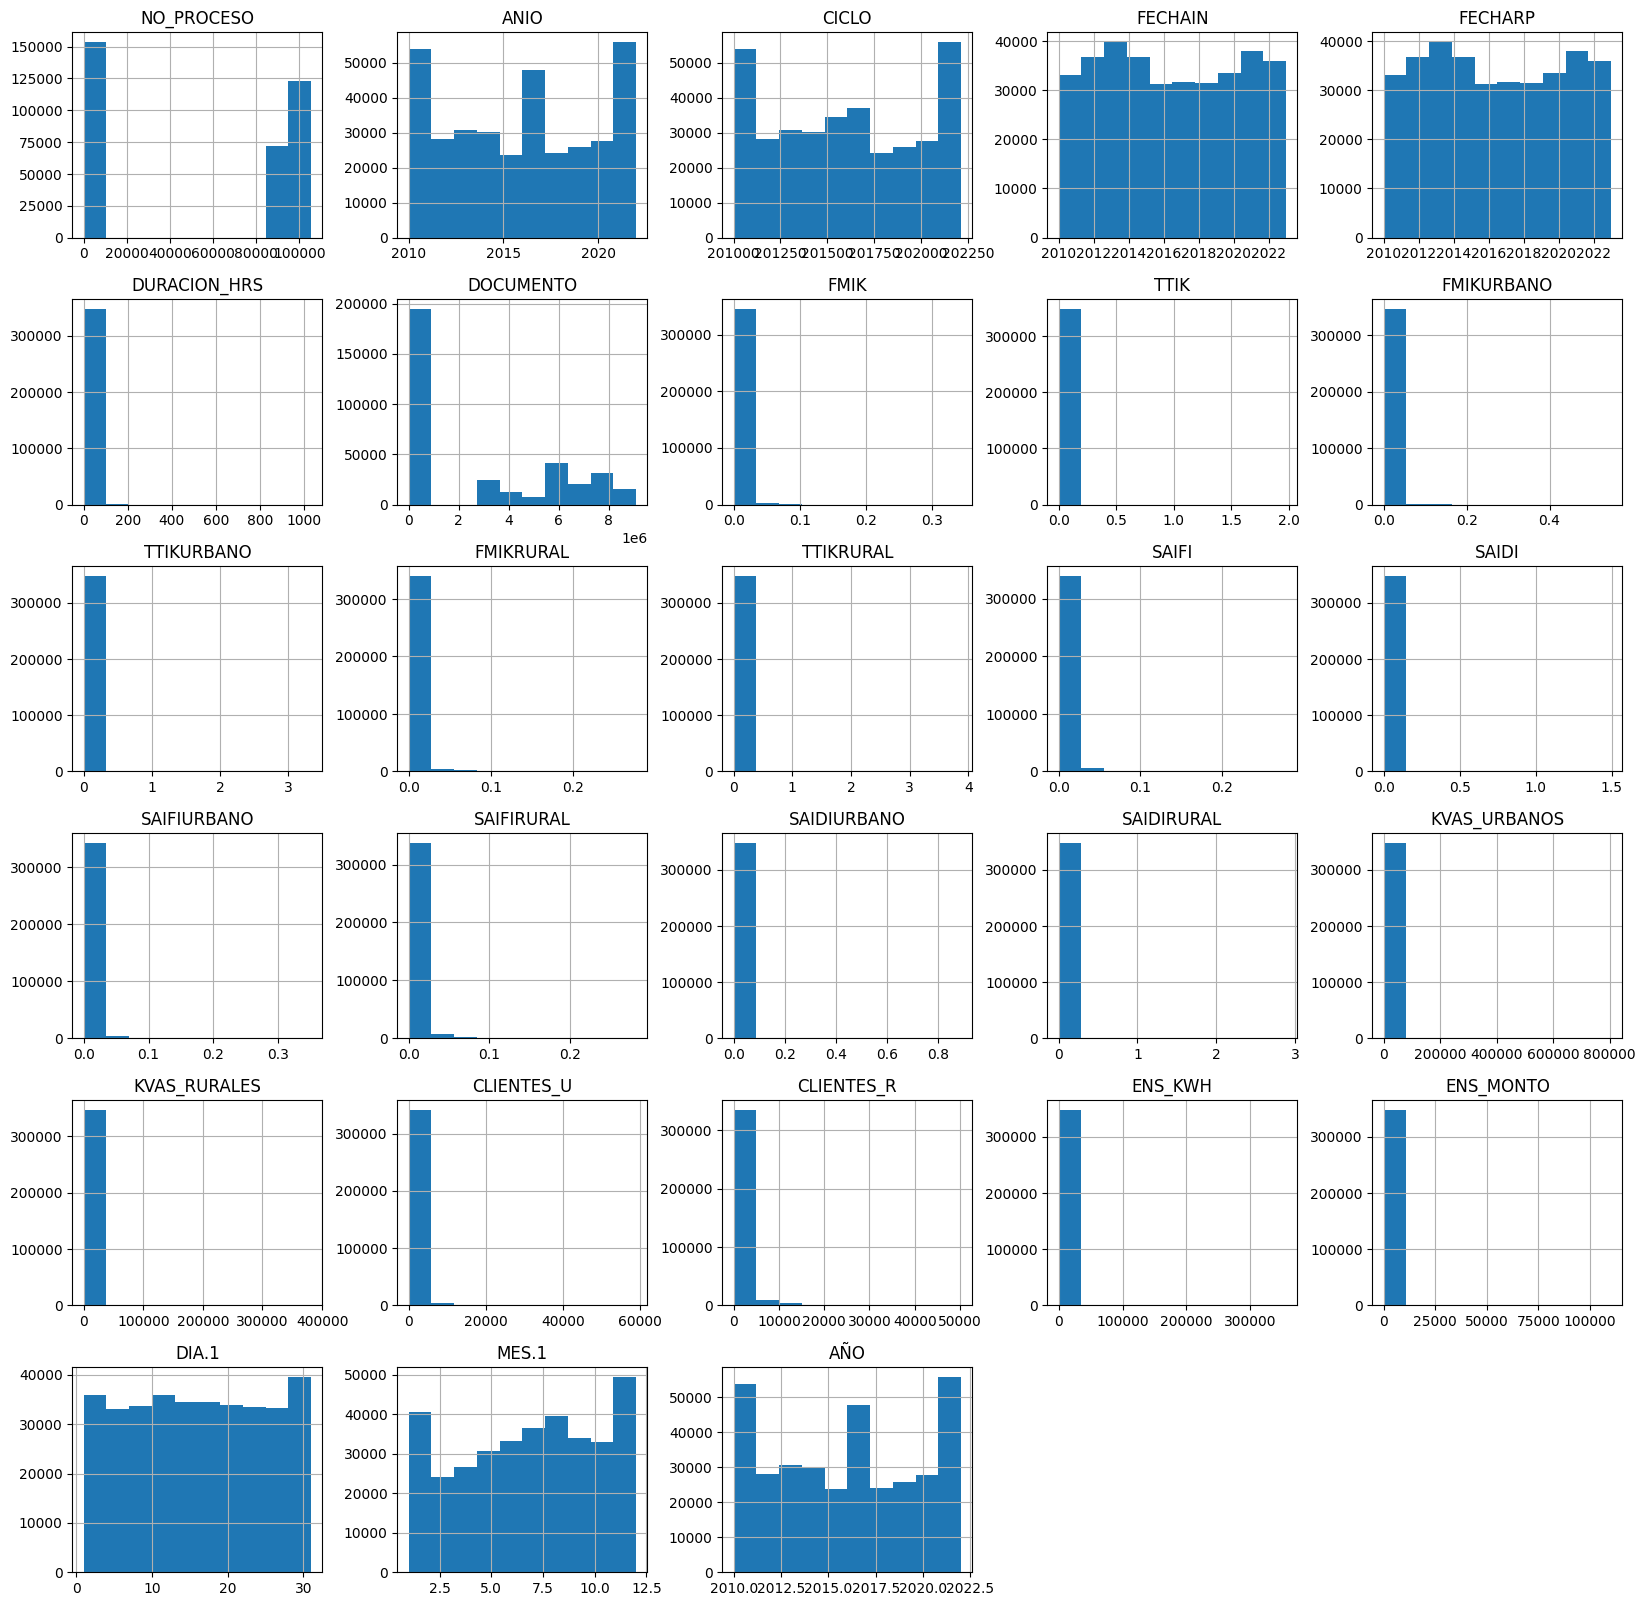

In [ ]:
# HISTOGRAMA DE DATOS
dato.hist(figsize=(20,20))

,variable_1,variable_2,r,abs_r
651,AÑO,ANIO,1.000000,1.000000
51,ANIO,AÑO,1.000000,1.000000
53,CICLO,ANIO,0.999965,0.999965
28,ANIO,CICLO,0.999965,0.999965
652,AÑO,CICLO,0.999965,0.999965
...,...,...,...,...
191,FMIKURBANO,FMIKRURAL,0.170249,0.170249
397,SAIDIURBANO,FMIKURBANO,0.162167,0.162167
197,FMIKURBANO,SAIDIURBANO,0.162167,0.162167
512,CLIENTES_U,KVAS_RURALES,0.157268,0.157268


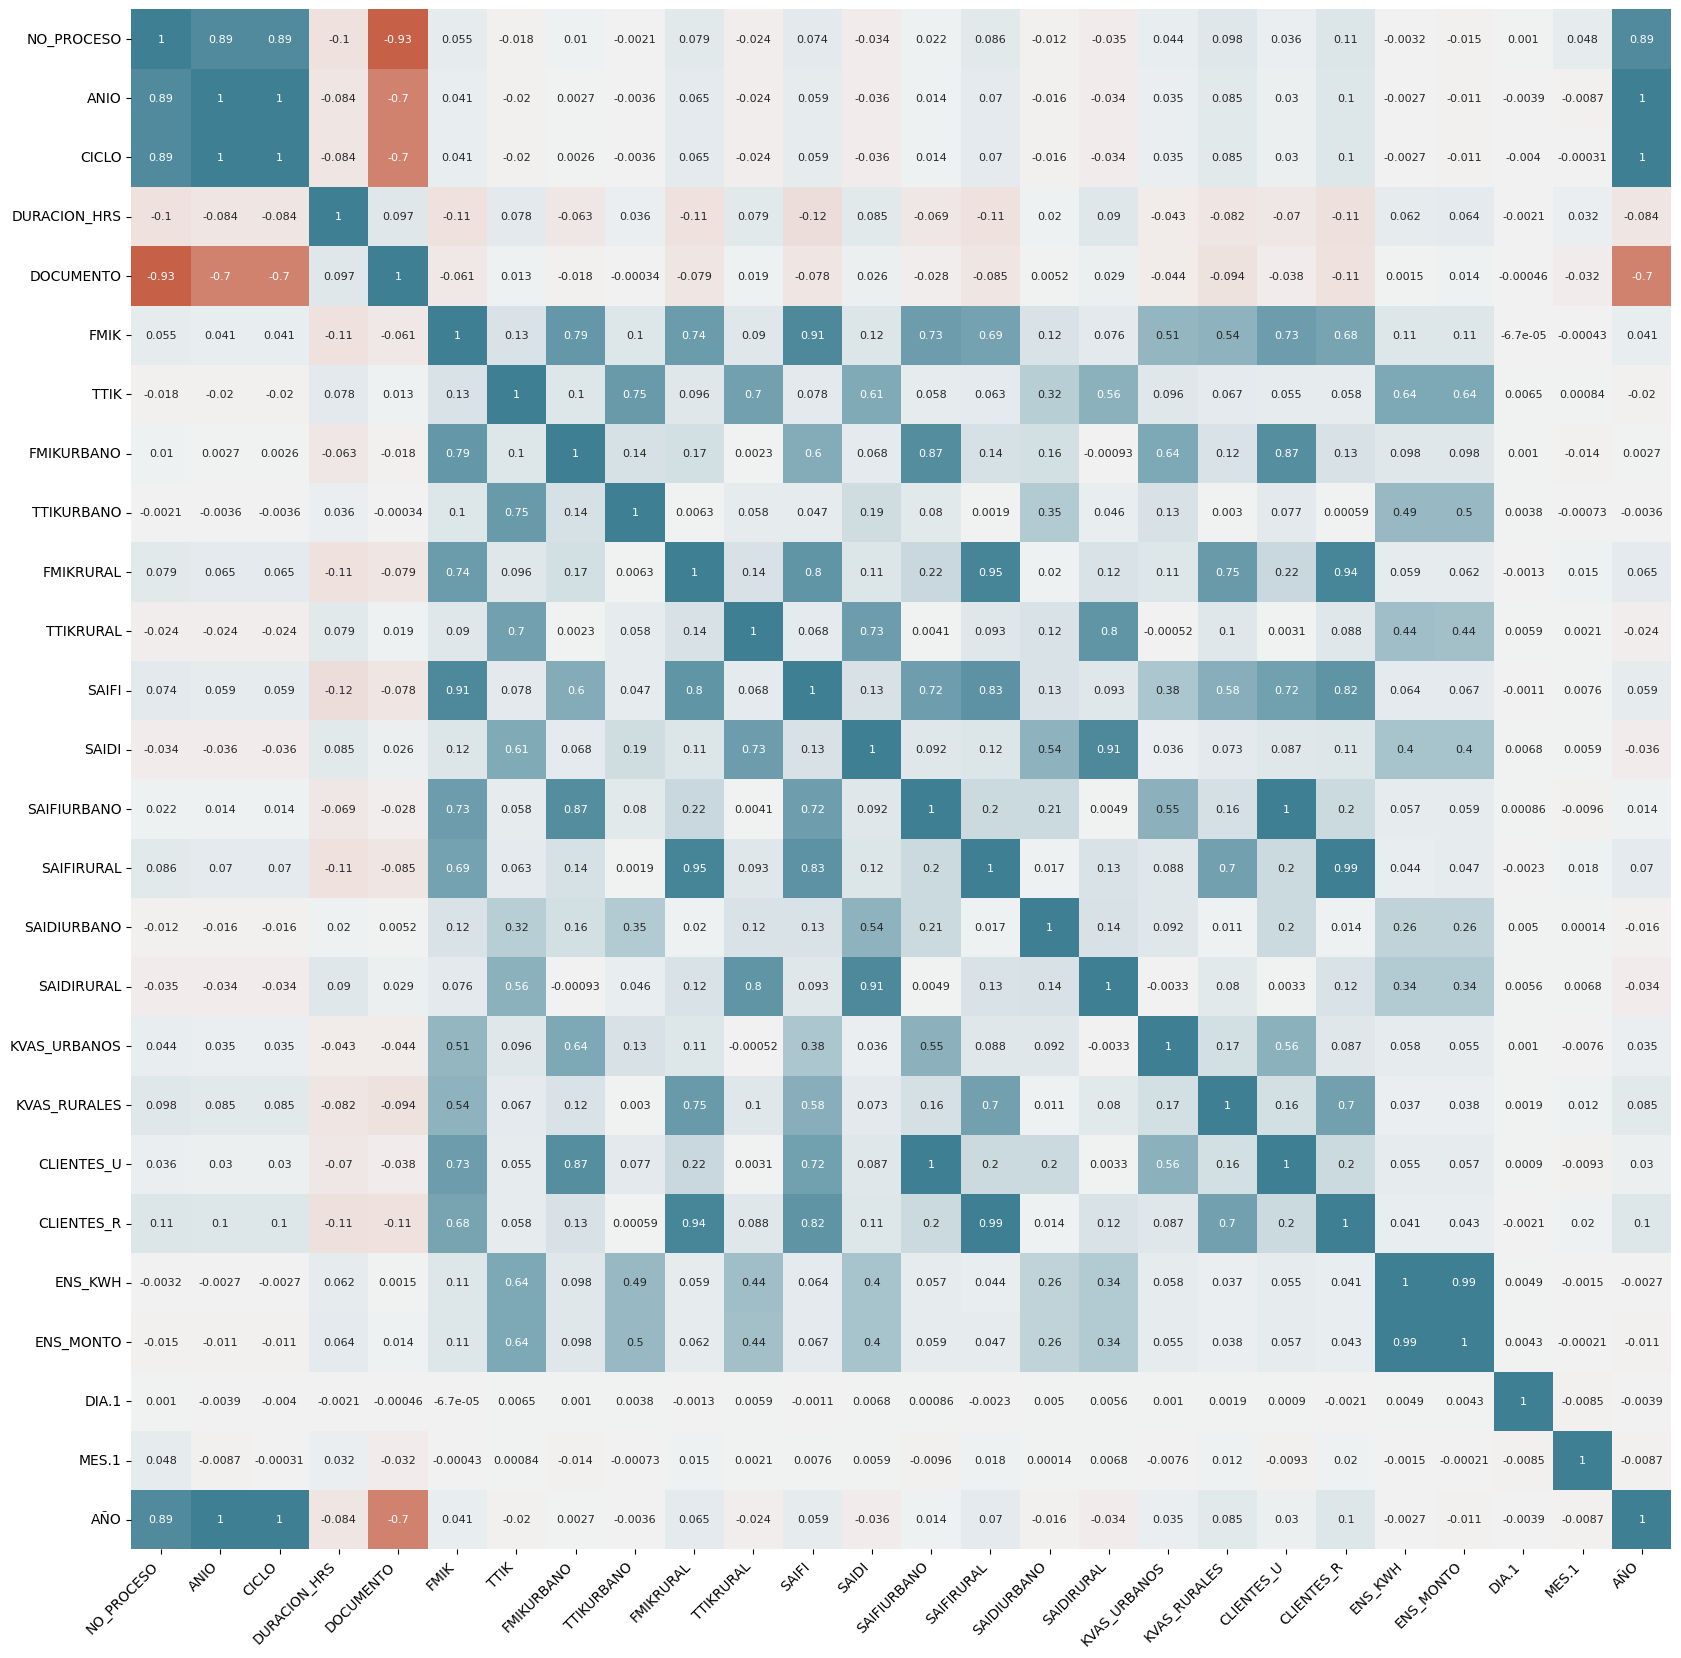

In [ ]:
# ANALISIS DE VARIABLES ESTADISTICAS

# MATRIZ DE CORRELLACION DE VARIABLES

# encontrar correlAacciones matematicas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
corr_matrix =dato.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = dato.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(150)

INGENIERIA DE CARACTERISTICAS

In [ ]:
dato.columns

Index(['NO_PROCESO', 'DIA', 'año', 'MES', 'ciclo', 'IDINTER', 'IDREPOS',
       'SISTEMA', 'ORIGEN', 'TIPO', 'RESOLUCIONSIGET', 'FECHAIN', 'FECHARP',
       'DURACION_HRS', 'TIPO_DURACION', 'APERTURA', 'REPOSICION', 'SSEE_1',
       'CKTO_1', 'SSEE_2', 'CKTO_2', 'region', 'DOCUMENTO', 'TIPO_TICKET',
       'Causa General', 'Causa Especifica', ''EST_TIEMPO'', 'COMMENTS', 'FMIK',
       'TTIK', 'FMIKURBANO', 'TTIKURBANO', 'FMIKRURAL', 'TTIKRURAL', 'SAIFI',
       'SAIDI', 'SAIFIURBANO', 'SAIFIRURAL', 'SAIDIURBANO', 'SAIDIRURAL',
       'KVAS_URBANOS', 'KVAS_RURALES', 'CLIENTES_U', 'CLIENTES_R', 'ENS_KWH',
       'ENS_MONTO', 'DIA.1', 'MES.1', 'AÑO'],
      dtype='object')

In [ ]:
dato.rename(columns = {'ANIO':'año', 'CICLO':'ciclo','REGION':'region'}, inplace = True)

In [ ]:
dato.columns

Index(['NO_PROCESO', 'DIA', 'año', 'MES', 'ciclo', 'IDINTER', 'IDREPOS',
       'SISTEMA', 'ORIGEN', 'TIPO', 'RESOLUCIONSIGET', 'FECHAIN', 'FECHARP',
       'DURACION_HRS', 'TIPO_DURACION', 'APERTURA', 'REPOSICION', 'SSEE_1',
       'CKTO_1', 'SSEE_2', 'CKTO_2', 'region', 'DOCUMENTO', 'TIPO_TICKET',
       'Causa General', 'Causa Especifica', ''EST_TIEMPO'', 'COMMENTS', 'FMIK',
       'TTIK', 'FMIKURBANO', 'TTIKURBANO', 'FMIKRURAL', 'TTIKRURAL', 'SAIFI',
       'SAIDI', 'SAIFIURBANO', 'SAIFIRURAL', 'SAIDIURBANO', 'SAIDIRURAL',
       'KVAS_URBANOS', 'KVAS_RURALES', 'CLIENTES_U', 'CLIENTES_R', 'ENS_KWH',
       'ENS_MONTO', 'DIA.1', 'MES.1', 'AÑO'],
      dtype='object')

In [ ]:
dato.head()

,NO_PROCESO,DIA,año,MES,ciclo,IDINTER,IDREPOS,SISTEMA,ORIGEN,TIPO,...,SAIDIRURAL,KVAS_URBANOS,KVAS_RURALES,CLIENTES_U,CLIENTES_R,ENS_KWH,ENS_MONTO,DIA.1,MES.1,AÑO
0,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010001,D20100101000101,M,I,F,...,0.002482,0.0,48.0,0,81,36.024402,9.716143,1,1,2010
1,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010002,D20100101000201,M,I,F,...,0.000008,22127.0,513.0,15950,82,64.935387,17.257344,1,1,2010
2,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010003,D20100101000301,M,I,M,...,0.000123,0.0,15.0,0,34,1.797834,0.485082,1,1,2010
3,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010004,D20100101000401,M,I,F,...,0.002435,0.0,305.0,1,163,34.854515,9.380839,1,1,2010
4,0,2010-01-01 00:00:00,2010,ENE,201001,D201001010005,D20100101000501,M,I,F,...,0.000000,48.0,0.0,47,0,16.355626,4.361248,1,1,2010


In [ ]:
dato.columns

Index(['NO_PROCESO', 'DIA', 'año', 'MES', 'ciclo', 'IDINTER', 'IDREPOS',
       'SISTEMA', 'ORIGEN', 'TIPO', 'RESOLUCIONSIGET', 'FECHAIN', 'FECHARP',
       'DURACION_HRS', 'TIPO_DURACION', 'APERTURA', 'REPOSICION', 'SSEE_1',
       'CKTO_1', 'SSEE_2', 'CKTO_2', 'region', 'DOCUMENTO', 'TIPO_TICKET',
       'Causa General', 'Causa Especifica', ''EST_TIEMPO'', 'COMMENTS', 'FMIK',
       'TTIK', 'FMIKURBANO', 'TTIKURBANO', 'FMIKRURAL', 'TTIKRURAL', 'SAIFI',
       'SAIDI', 'SAIFIURBANO', 'SAIFIRURAL', 'SAIDIURBANO', 'SAIDIRURAL',
       'KVAS_URBANOS', 'KVAS_RURALES', 'CLIENTES_U', 'CLIENTES_R', 'ENS_KWH',
       'ENS_MONTO', 'DIA.1', 'MES.1', 'AÑO'],
      dtype='object')

MODELADO USANDO PROPHET

In [ ]:
new=dato[['DIA','DURACION_HRS']]
new['FECHA']=pd.to_datetime(dato['DIA'])
new.rename(columns = {'DIA':'ds'}, inplace = True)
new.rename(columns = {'DURACION_HRS':'y'}, inplace = True)

m = Prophet()
m.fit(new)

NameError: name 'dato' is not defined

In [ ]:
# FUTURE FORECAST
future=m.make_future_dataframe(periods=365)
future.tail(20)

df2=future.to_csv('Predicciones.csv')


NameError: name 'm' is not defined

In [ ]:
# Python
forecast = m.predict(future)
#"Guardar prediccioenes "
prediccions=forecast.to_csv('predicciones.csv')
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(200)

In [ ]:
# Python
fig1 = m.plot(forecast)


In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# diagnostics


from prophet.diagnostics import cross_validation
df_cv = cross_validation(
    m, '365 days', initial='1825 days', period='365 days')
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

In [ ]:
# model evaluation
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
ax.text(x=pd.to_datetime('2010-01-01'),y=12, s='Initial', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2012-08-01'),y=12, s='Cutoff', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')
ax.text(x=pd.to_datetime('2013-01-01'),y=6, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8);